In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [3]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """

    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO 2: Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
                'housing', 'loan', 'default']

    # TODO 3 (Part 1): Select features
    X = df[features]

    # TODO 3 (Part 2): Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X) # Apply StandardScaler

    return X_scaled, df

try:
    X_scaled, data = load_data('bank-full.csv')
    print("Data shape:", X_scaled.shape)
    print("First 5 rows of scaled data:\n", X_scaled[:5])
except FileNotFoundError:
    print("Error: 'bank-full.csv' not found.")
    print("Please upload the file to your Colab session or mount your Google Drive.")

Data shape: (45211, 9)
First 5 rows of scaled data:
 [[ 1.60696496  0.25641925 -0.56935064 -0.25194037 -0.10381968  1.03636182
   0.89391541 -0.43680347 -0.13548989]
 [ 0.28852927 -0.43789469 -0.56935064 -0.25194037  1.42400783 -0.30055587
   0.89391541 -0.43680347 -0.13548989]
 [-0.74738448 -0.44676247 -0.56935064 -0.25194037 -0.71495069 -0.30055587
   0.89391541  2.2893591  -0.13548989]
 [ 0.5710512   0.04720545 -0.56935064 -0.25194037 -1.02051619  2.37327951
   0.89391541 -0.43680347 -0.13548989]
 [-0.74738448 -0.44709091 -0.56935064 -0.25194037  2.03513884  2.37327951
  -1.11867408 -0.43680347 -0.13548989]]


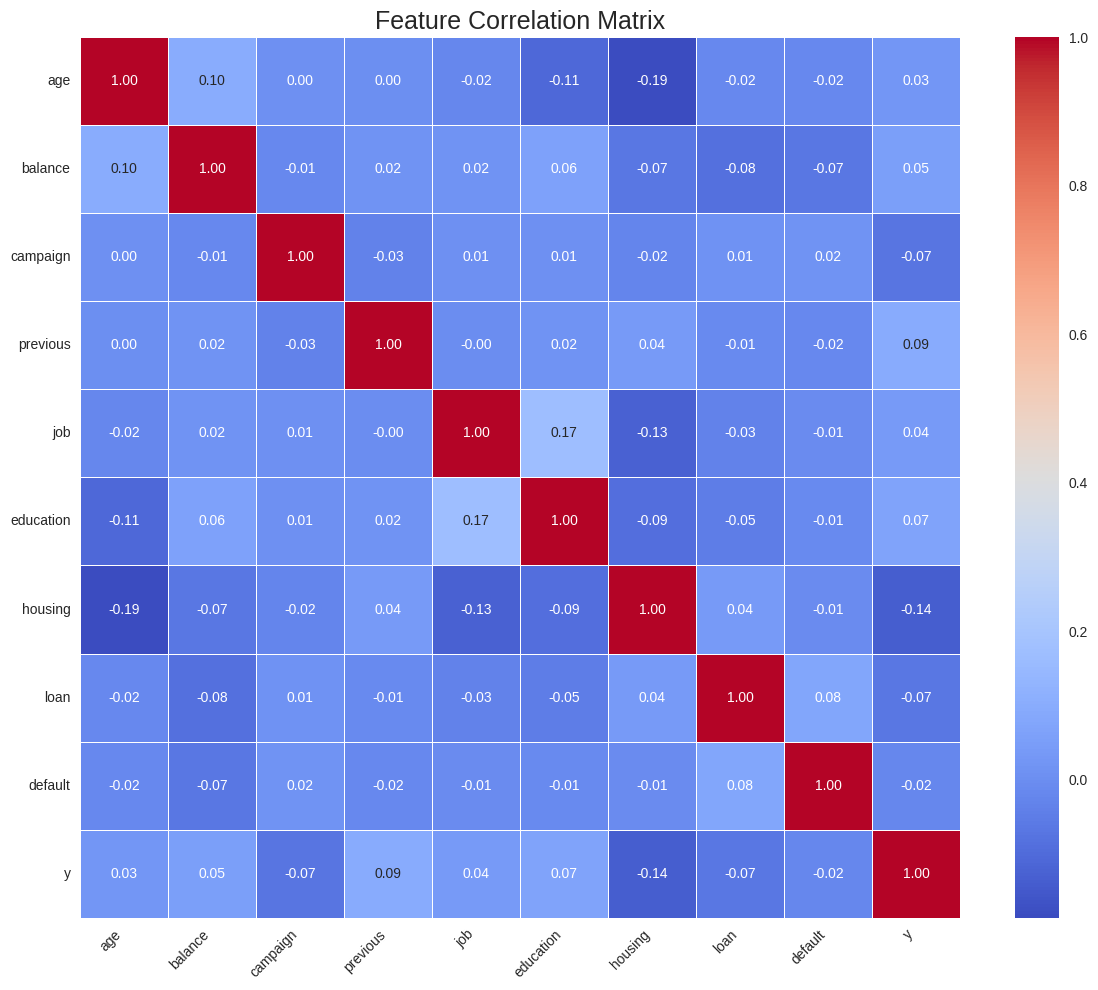

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# We'll use the 'data' DataFrame returned by your load_data function.
# This DataFrame has the categorical columns already encoded to numbers,
# which is necessary for calculating correlation.
try:
    # Calculate the correlation matrix
    # We'll select only the features used for clustering + the target 'y'
    # to make the plot more readable.
    features_of_interest = ['age', 'balance', 'campaign', 'previous', 'job',
                            'education', 'housing', 'loan', 'default', 'y']

    corr_matrix = data[features_of_interest].corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))

    # Generate a heatmap
    # annot=True writes the data value in each cell
    # fmt='.2f' formats the numbers to 2 decimal places
    # cmap='coolwarm' gives the red-blue color scheme
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                linewidths=0.5, annot_kws={"size": 10})

    plt.title('Feature Correlation Matrix', fontsize=18)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    #

except NameError:
    print("It looks like the 'data' DataFrame is not defined.")
    print("Please make sure you have run the 'load_data' cell successfully first.")
except KeyError:
    print("Error: One of the columns in 'features_of_interest' was not found in your 'data' DataFrame.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Make sure 'data' is a pandas DataFrame with numerical values.")

In [6]:
import numpy as np

class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        # Set the random seed for reproducibility
        np.random.seed(self.random_state)

        # Get the number of samples
        n_samples = X.shape[0]

        # Use np.random.choice to select random, *distinct* indices
        # replace=False ensures we get unique points
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)

        # Select the points from X corresponding to those indices
        centroids = X[indices]

        return centroids

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        # We use broadcasting to compute distances efficiently.
        # X shape: (n_samples, n_features)
        # self.centroids shape: (n_clusters, n_features)

        # 1. Expand X to (n_samples, 1, n_features)
        # 2. self.centroids is broadcast to (1, n_clusters, n_features)
        # 3. The subtraction (X_expanded - C) results in shape (n_samples, n_clusters, n_features)
        #    This array holds all (point - centroid) vectors.
        distances_vec = X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]

        # 4. Compute the Euclidean norm (L2 norm) along the feature axis (axis=2)
        #    This results in a (n_samples, n_clusters) matrix of distances.
        distances = np.linalg.norm(distances_vec, axis=2)

        # 5. Find the *index* (cluster ID) of the minimum distance for each sample.
        #    np.argmin along axis=1 does this.
        labels = np.argmin(distances, axis=1)

        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        n_features = X.shape[1]

        # Create an empty array to store the new centroids
        new_centroids = np.zeros((self.n_clusters, n_features))

        # Loop over each cluster
        for k in range(self.n_clusters):
            # 1. Find all points belonging to this cluster 'k'
            #    (labels == k) creates a boolean mask
            points_in_cluster = X[labels == k]

            # 2. Check if the cluster is empty
            if len(points_in_cluster) > 0:
                # If not empty, compute the mean of these points along axis 0
                new_centroids[k] = np.mean(points_in_cluster, axis=0)
            else:
                # If cluster is empty, keep the old centroid position.
                # This is the "leave unchanged" strategy.
                new_centroids[k] = self.centroids[k]

        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        # 1. Initialize centroids
        self.centroids = self._initialize_centroids(X)

        # 2. Start the iterative loop
        for _ in range(self.max_iters):
            # Store the old centroids to check for convergence
            old_centroids = np.copy(self.centroids)

            # --- Assignment Step ---
            # Assign all points to the nearest centroid
            self.labels = self._assign_clusters(X)

            # --- Update Step ---
            # Recompute centroids based on new assignments
            self.centroids = self._update_centroids(X, self.labels)

            # 3. Check for convergence
            # We use np.allclose for safe floating-point comparison
            if np.allclose(old_centroids, self.centroids):
                break  # Stop the loop if centroids haven't changed

        # 4. Return the fitted model instance
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        # Re-use the _assign_clusters method with the *final* learned centroids
        return self._assign_clusters(X)

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

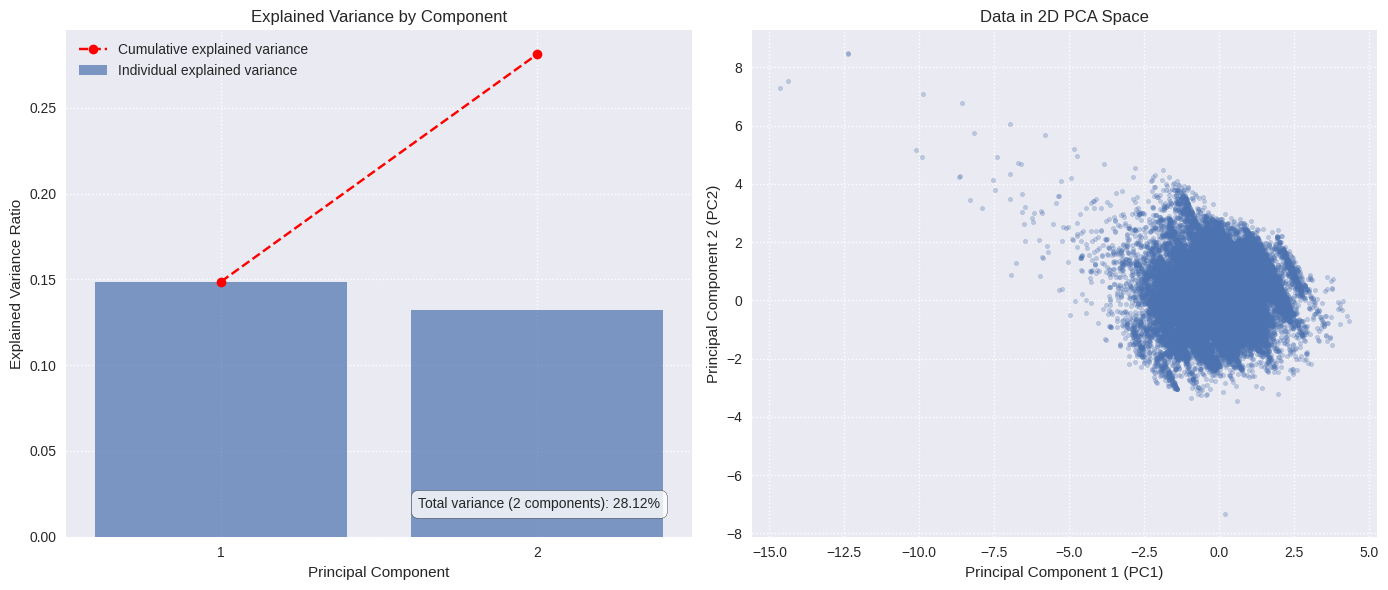

Shape after PCA: (45211, 2)


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # --- TODO: Create visualization ---
    # We'll create two plots side-by-side
    plt.figure(figsize=(14, 6))

    # Plot 1: Explained variance
    ax1 = plt.subplot(1, 2, 1)

    # Get the variance data
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    components = range(1, n_components + 1)

    # Create the bar plot for individual variance
    ax1.bar(components, explained_variance, alpha=0.7, align='center',
            label='Individual explained variance')

    # Create the line plot for cumulative variance
    ax1.plot(components, cumulative_variance, marker='o', linestyle='--',
             color='r', label='Cumulative explained variance')

    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio')
    ax1.set_title('Explained Variance by Component')
    ax1.set_xticks(components)
    ax1.legend(loc='best')
    ax1.grid(True, linestyle=':')

    # Add total variance text
    total_variance = cumulative_variance[-1]
    ax1.text(0.95, 0.05, f'Total variance (2 components): {total_variance:.2%}',
             ha='right', va='bottom', transform=ax1.transAxes,
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))


    # Plot 2: Data in 2D
    ax2 = plt.subplot(1, 2, 2)
    # Use alpha for transparency to see density
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3, s=10)

    ax2.set_xlabel('Principal Component 1 (PC1)')
    ax2.set_ylabel('Principal Component 2 (PC2)')
    ax2.set_title('Data in 2D PCA Space')
    ax2.grid(True, linestyle=':')

    plt.tight_layout()
    plt.show()
    # --- End of TODO ---

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

Calculating inertias for k=1 to 10...
Calculation complete.


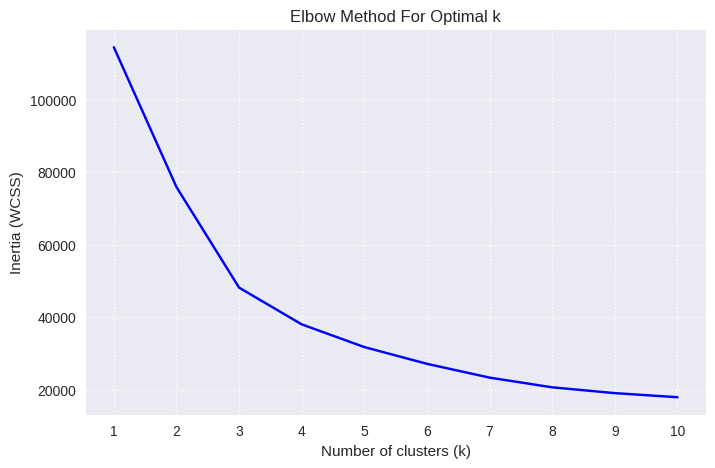


Running final clustering with k=3...


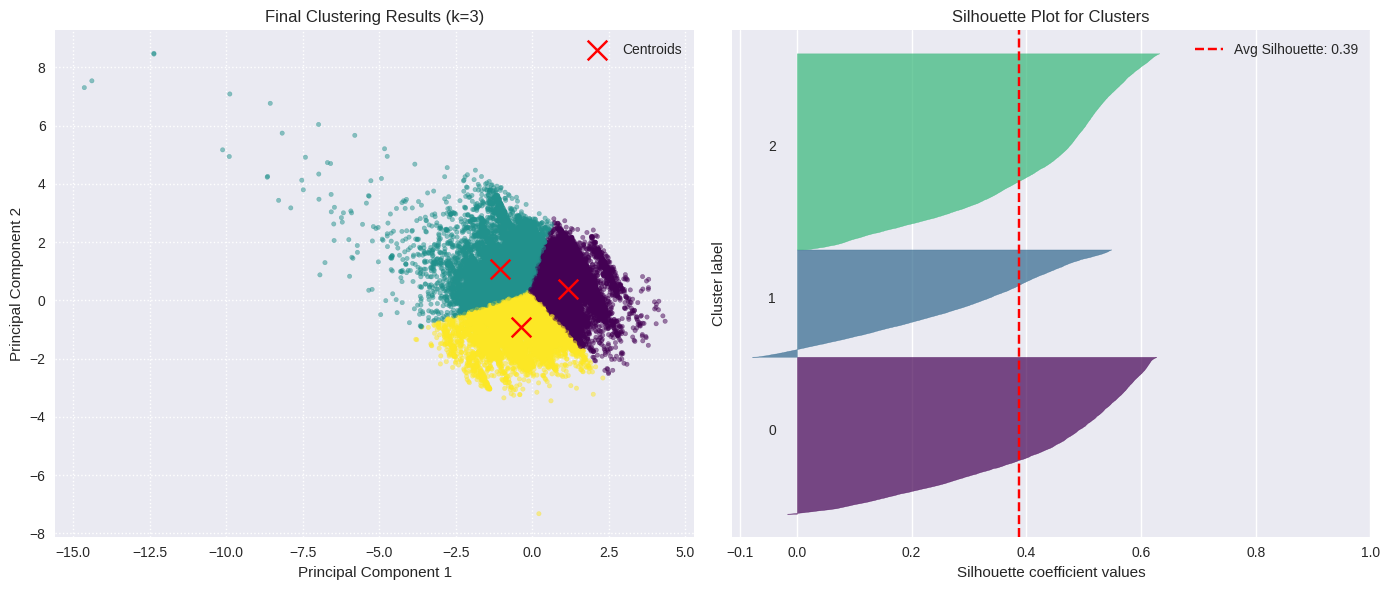


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
# Assuming KMeansClustering is in a previous cell
# Assuming X_pca is defined

def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0

    # --- Vectorized Implementation ---
    # 1. Get the centroid assigned to each point
    assigned_centroids = centroids[labels]

    # 2. Calculate the element-wise difference (X - assigned_centroids)
    #    This gives a (n_samples, n_features) array of vectors.
    distances_vec = X - assigned_centroids

    # 3. Calculate the squared norm (squared length) of each vector
    #    np.linalg.norm(..., axis=1) gives the norm (length)
    #    ** 2 squares it.
    squared_distances = np.linalg.norm(distances_vec, axis=1)**2

    # 4. Sum up all squared distances
    inertia = np.sum(squared_distances)

    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.

    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    K = range(1, max_k + 1)

    print(f"Calculating inertias for k=1 to {max_k}...")

    # Calculate inertia for different k values
    # Your code here
    for k in K:
        # 1. Create and fit the model
        kmeans_model = KMeansClustering(n_clusters=k, random_state=42)
        kmeans_model.fit(X)

        # 2. Calculate inertia using our function
        inertia = calculate_inertia(X, kmeans_model.labels, kmeans_model.centroids)

        # 3. Store it
        inertias.append(inertia)

    print("Calculation complete.")

    # Create elbow plot
    # Your code here
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertias, 'bx-') # 'b'lue, 'x' markers, '-' line
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.title('Elbow Method For Optimal k')
    plt.grid(True, linestyle=':')
    plt.xticks(K)
    plt.show()

    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca, max_k=10) # Use the 2D PCA data

# Apply final clustering
# --- Look at your elbow plot to pick the best k! ---
# I'll stick with 3 for the example, but you should change this.
optimal_k = 3
print(f"\nRunning final clustering with k={optimal_k}...")

kmeans = KMeansClustering(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(14, 6)) # Increased width for two plots

# Plot clusters
plt.subplot(1, 2, 1)
# Using `c` sets color based on cluster label, `cmap` defines the color map
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', s=10, alpha=0.5)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title(f'Final Clustering Results (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle=':')

# Plot evaluation metrics
plt.subplot(1, 2, 2)
# --- Your code here: Add relevant evaluation metric plots ---
# A silhouette plot is the perfect metric to add here.

n_clusters = optimal_k
labels = kmeans.labels
silhouette_avg = silhouette_score(X_pca, labels)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_pca, labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate, sort, and plot silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.viridis(float(i) / n_clusters) # Get color from the same cmap
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--",
            label=f'Avg Silhouette: {silhouette_avg:.2f}')
plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.legend()
# --- End of TODO ---


plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [9]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)
        """
        n_samples, _ = X.shape

        # 1. Start with all points assigned to label 0.
        self.labels_ = np.zeros(n_samples, dtype=int)

        # Calculate and store the centroid for the initial cluster (all data)
        self.centers_[0] = X.mean(axis=0)

        current_cluster_count = 1
        next_new_label = 1 # This will be the ID for the next new cluster

        # 2. Loop while number of unique labels < n_clusters
        while current_cluster_count < self.n_clusters:

            # 3. Select a cluster to split: the largest cluster by size
            #    We use np.unique to get the counts for each *existing* label
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            label_to_split = unique_labels[np.argmax(counts)]

            # 4. Get the *data* and *global indices* for only that cluster
            mask_to_split = (self.labels_ == label_to_split)
            X_to_split = X[mask_to_split]

            # Get the global indices of these points. This is crucial for re-labeling.
            global_indices_to_split = np.where(mask_to_split)[0]

            # Safety check: if a cluster has 1 point, it can't be split.
            if X_to_split.shape[0] < 2:
                continue # Skip this cluster and try another one in the next loop

            # 5. Run a binary KMeans (k=2)
            #    We use sklearn's KMeans for simplicity, as hinted
            binary_kmeans = KMeans(n_clusters=2,
                                   random_state=self.random_state,
                                   n_init=10) # n_init=10 is the default and good practice

            # binary_labels will be an array of 0s and 1s
            binary_labels = binary_kmeans.fit_predict(X_to_split)

            # 6. Assign new labels
            # The "new" label will be the next available integer
            new_label = next_new_label
            next_new_label += 1

            # Now, update the main `self.labels_` array.
            # We find which of the split points were assigned to cluster '1'
            # by the binary_kmeans. Those get the new_label.
            # The points assigned '0' keep their original `label_to_split`.
            indices_for_new_label = global_indices_to_split[binary_labels == 1]
            self.labels_[indices_for_new_label] = new_label

            # 7. Record parent -> (left, right) and new centroids
            # The parent `label_to_split` is now split into two children:
            # - `label_to_split` (points that got binary label 0)
            # - `new_label` (points that got binary label 1)
            self.split_tree[label_to_split] = (label_to_split, new_label)

            # Update/store the centroids for the two new child clusters
            self.centers_[label_to_split] = binary_kmeans.cluster_centers_[0]
            self.centers_[new_label] = binary_kmeans.cluster_centers_[1]

            # 8. Increment cluster count
            current_cluster_count += 1

        # 9. Set and return self.labels_
        return self.labels_


Running Bisecting K-Means for k=4...


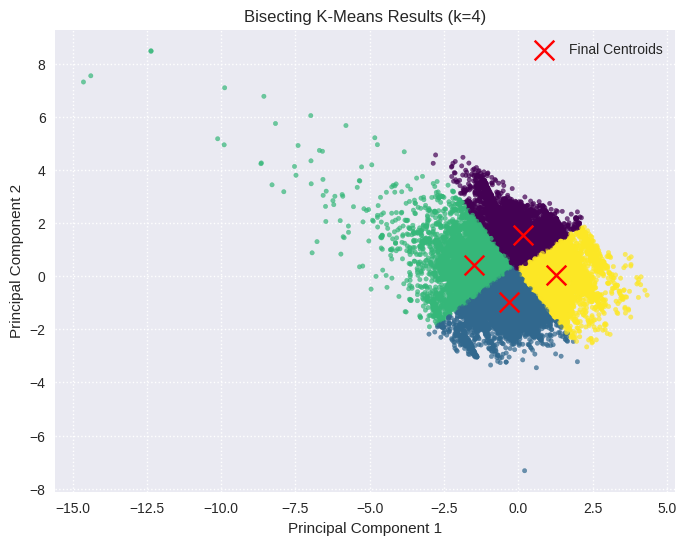


Split Tree (Parent -> (Child1, Child2)):
{np.int64(0): (np.int64(0), 3), np.int64(1): (np.int64(1), 2)}


In [10]:
from sklearn.cluster import KMeans
# Make sure X_pca is defined from the previous PCA step

print("\nRunning Bisecting K-Means for k=4...")
bisect = BisectingKMeans(n_clusters=4, random_state=42)
labels = bisect.fit_predict(X_pca)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)

# Add the final centroids
# We need to collect them from the .centers_ dict
final_labels = np.unique(labels)
final_centers = np.array([bisect.centers_[label] for label in final_labels])

plt.scatter(final_centers[:, 0], final_centers[:, 1], c='red', marker='x', s=200, label='Final Centroids')
plt.title('Bisecting K-Means Results (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

print("\nSplit Tree (Parent -> (Child1, Child2)):")
print(bisect.split_tree)

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!